# Financial Inclusion in Africa

##### This project predicts the likelihood of a person having a bank account or not (Yes = 1, No = 0), for each unique id in the test dataset.
##### The model was trained  on 70% of the data and tested on the final 30% of the data, across four East African countries - Kenya, Rwanda, Tanzania, and Uganda.

##### This project involves:
##### 1. Importing the libaries needed and loading the data.
##### 2. Performing Explorative Data Analysis.
##### 3. Data Preprocessing and Data Wrangling.
##### 4. Creating a Model for the Prediction

# 1. Importing Libraries

In [2]:
# Importing necessary libraries for data handling, and visualization.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings for better readability.
import warnings
warnings.filterwarnings('ignore')


print("Libraries imported sucessfully.")

Libraries imported sucessfully.


#  Loading the Dataset

In [4]:
# Load Datasets
train = pd.read_csv(r"C:\Users\Maame Aba A. Arhin\Downloads\Train.csv")
test = pd.read_csv(r"C:\Users\Maame Aba A. Arhin\Downloads\Test.csv")
ss = pd.read_csv(r"C:\Users\Maame Aba A. Arhin\Downloads\SampleSubmission.csv")
variables = pd.read_csv(r"C:\Users\Maame Aba A. Arhin\Downloads\VariableDefinitions.csv")

print("Datasets loaded successfully.")

Datasets loaded successfully.


# 2. Performing Explorative Data Analysis

In [3]:
# Display first few rows to understand structure.
print("Training Data Preview:")
display(train.head(5))

print("Variables Definition Preview: ")
display(variables.head(5))

Training Data Preview:


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


Variables Definition Preview: 


,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"


In [4]:
train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [7]:
# Checking Dataset Shapes
print(f"Train dataset: {train.shape[0]} rows, {train.shape[1]} columns")
print(f"Test dataset: {test.shape[0]} rows, {test.shape[1]} columns")

Train dataset: 23524 rows, 13 columns
Test dataset: 10086 rows, 12 columns


##### The above output shows the number of rows and columns for train and test dataset. We have 13 variables in the train dataset, 12 independent variables and 1 dependent variable. In the test dataset, we have 12 independent variables.


In [5]:
# Checking for missing values.
print("missing values:", train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


##### We do not have any missing values in our dataset.

In [6]:
# Showing some information about our dataset.
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


##### The output shows the list of variables/features, sizes, if it contains missing values and data type for each variable. From the dataset, we don't have any missing values and we have 3 features of integer data type and 10 features of the object data type.

### Univariate Analysis
### Here we are analyzing data by examining each variable individually.

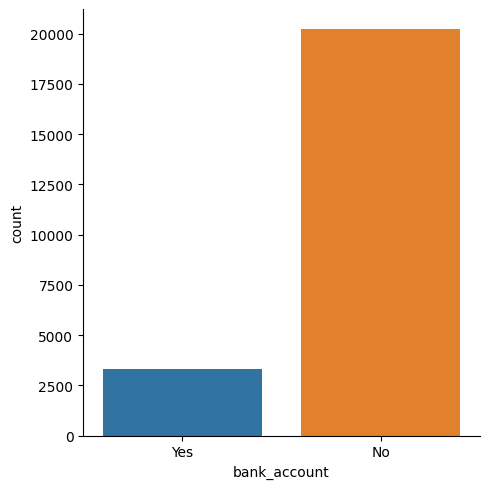

In [8]:
# Exploring Target Distribution
sns.catplot(x="bank_account", hue="bank_account", kind="count", data=train)

##### The data shows that we have a higher number of no class than yes class in our target variable showing a majority of people don't have bank accounts.

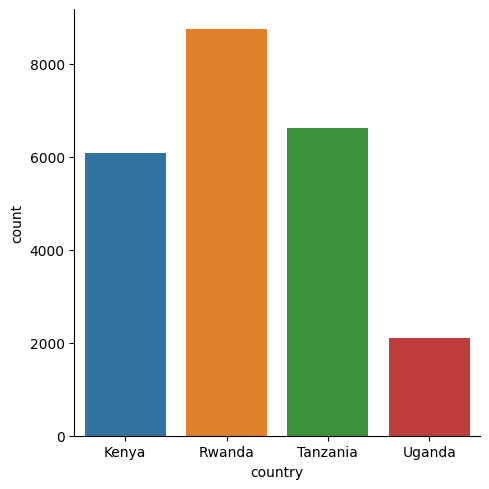

In [9]:
# Exploring Country Distribution
sns.catplot(x="country", hue="country", kind="count", data=train, palette="tab10")


#### The country feature in the above graph shows that most of the data were collected in Rwanda and lesser data were collected in Uganda.

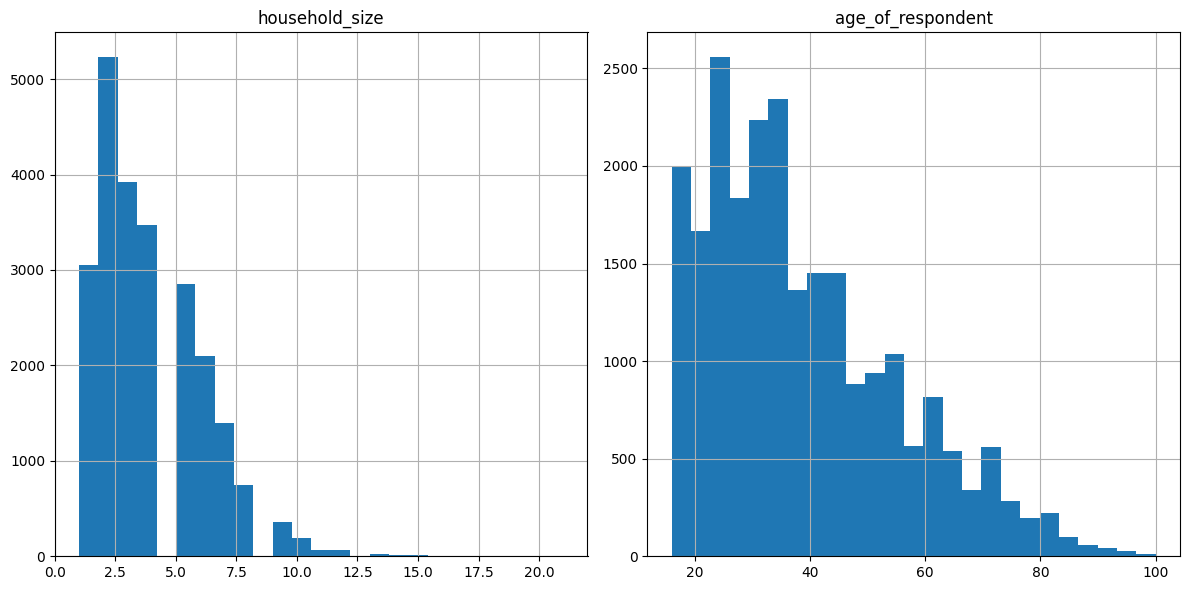

In [10]:
num_cols = ['household_size', 'age_of_respondent']
train[num_cols].hist(bins=25, figsize=(12,6)); plt.tight_layout()

#### Household_size is not normally distributed and the most common number of people living in a house is 2.
#### In our last variable called age_of_respondent, most of the respondent’s age is between 25 and 35.

## Bivariate Analysis

#### Here we are exploring the relationship between our target variable and the independent variables and assess the relationship between them.

([0, 1], [Text(0, 0, 'Rural'), Text(1, 0, 'Urban')])

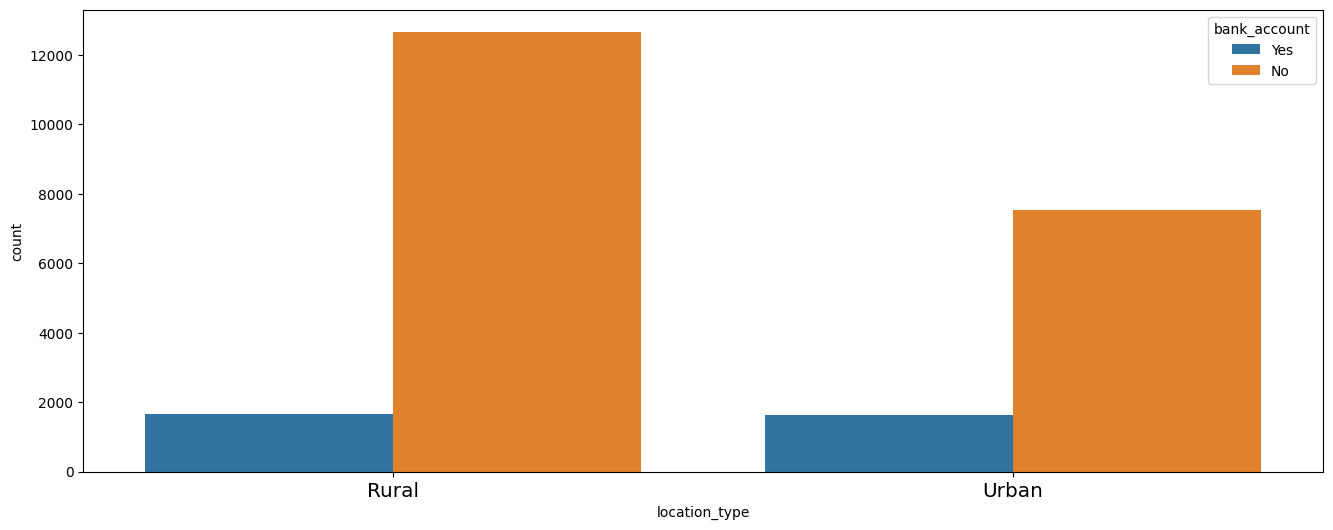

In [11]:
# Exploring location type with bank account.

plt.figure(figsize=(16, 6))
sns.countplot(x='location_type', hue= 'bank_account', data=train)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

##### From the above plot, you can realize that the majority of people living in rural areas don't have bank accounts. 

([0, 1], [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

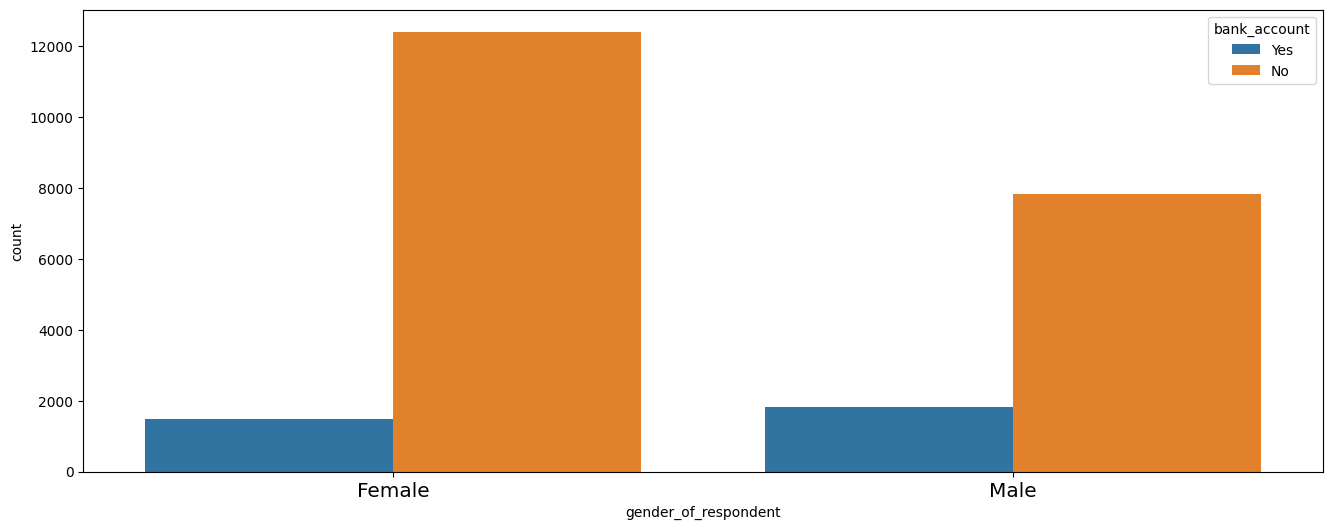

In [12]:
#Exploring gender_of_respondent with bank account 
plt.figure(figsize=(16, 6))
sns.countplot(x='gender_of_respondent', hue= 'bank_account', data=train)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

#### In the above plot, the plot shows there is a small difference between males and females who have bank accounts, however the number of males with bank accounts are greater than females.

([0, 1], [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

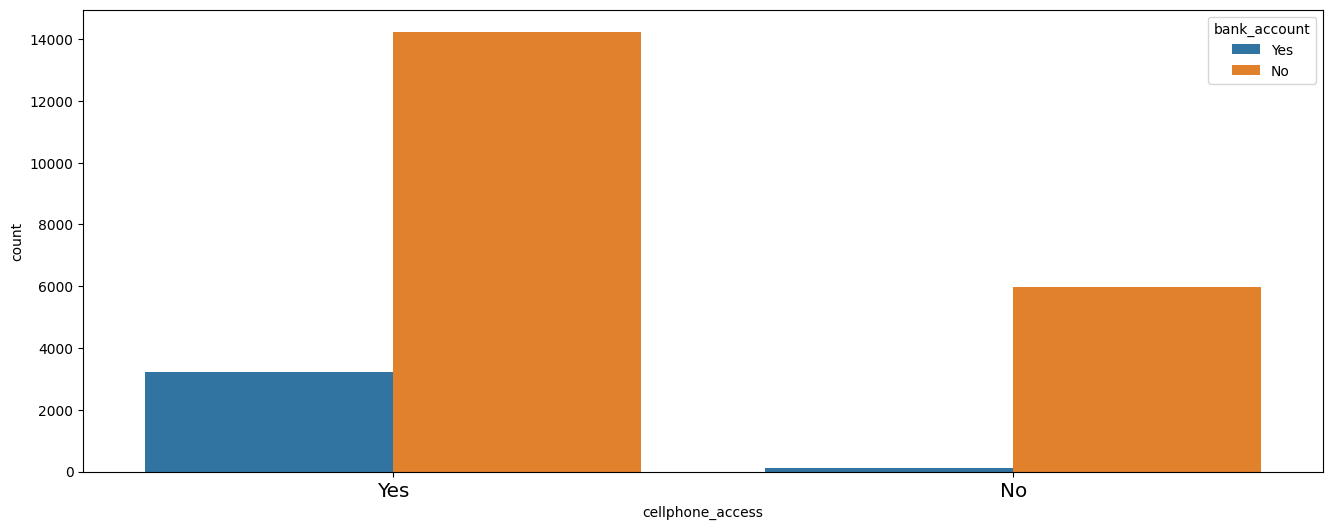

In [13]:
# Exploring cellphone_access with bank account.
plt.figure(figsize=(16, 6))
sns.countplot(x='cellphone_access', hue= 'bank_account', data=train)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

#### The above plot shows the majority of people who have cellphone access, don't have bank accounts. 

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Secondary education'),
  Text(1, 0, 'No formal education'),
  Text(2, 0, 'Vocational/Specialised training'),
  Text(3, 0, 'Primary education'),
  Text(4, 0, 'Tertiary education'),
  Text(5, 0, 'Other/Dont know/RTA')])

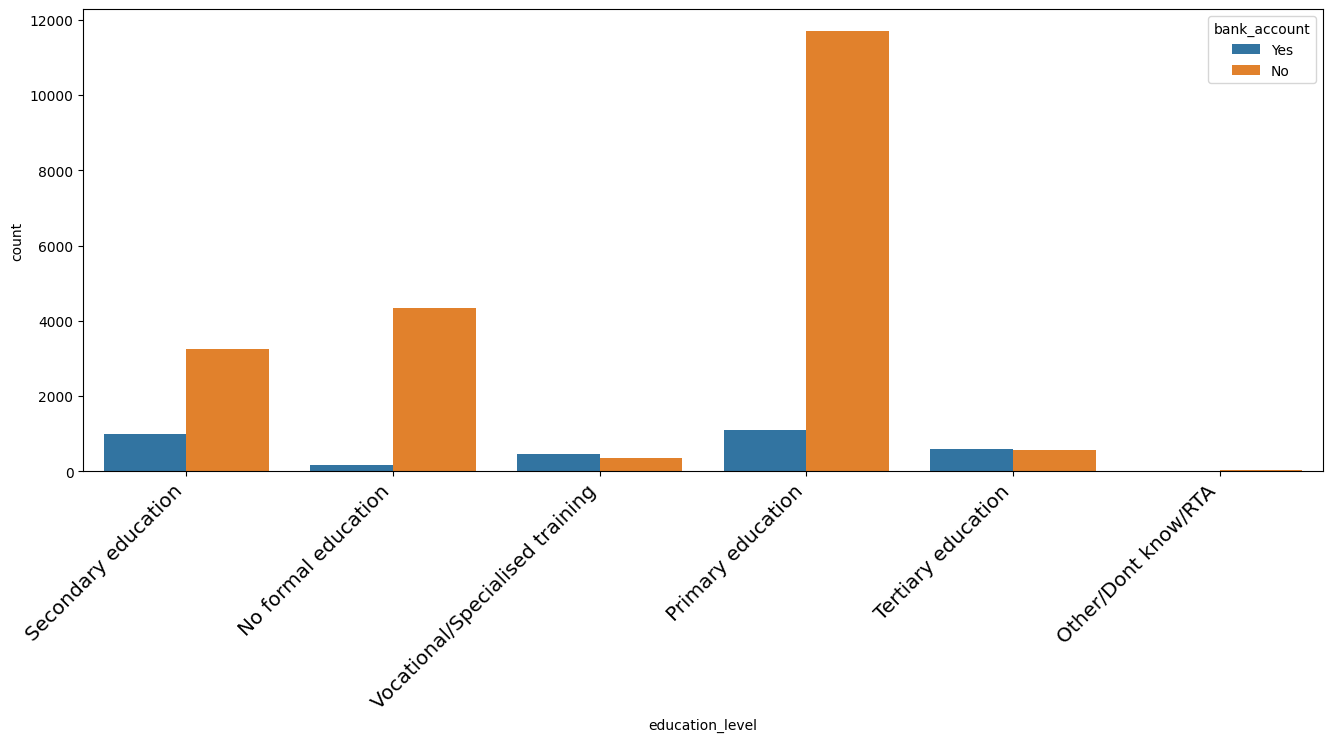

In [14]:
# Exploring education_level with bank account 
plt.figure(figsize=(16, 6))
sns.countplot(x='education_level', hue= 'bank_account', data=train)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

#### The education_level plot shows that the majority of people have primary education and most of them don't have bank accounts.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

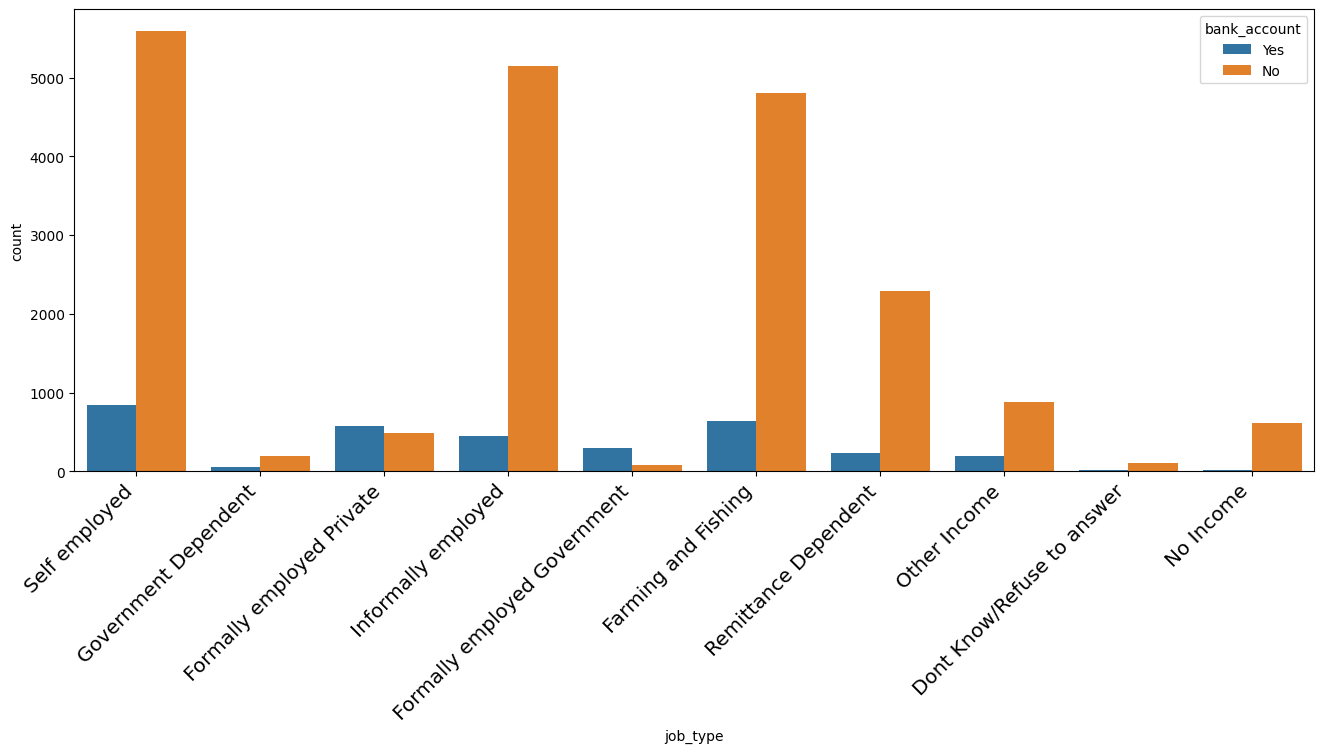

In [15]:
# Exploring job_type with bank account 
plt.figure(figsize=(16, 6))
sns.countplot(x='job_type', hue= 'bank_account', data=train)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

#### The job_type plot shows that the majority of people who are self-employed don't have access to the bank accounts, followed by informally employed and farming and fishing.

# 3. Data Preprocessing and Data Wrangling

#### Here we start by separating the independent variables and target (bank_account) from the train data. Then transform the target values from the object data type into numerical data by using LabelEncoder

In [16]:
# importing preprocessing module.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Converting target label to numerical Data.
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

# Separating training features from target.
X_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64


#### The target values have been transformed into numerical datatypes, 1 represents 'Yes' and 0 represents 'No'.

#### Here we are crearing a simple preprocessing function to:
#### 1. Handle conversion of data types
#### 2. Convert categorical features.
#### 3. Drop uniqueid variable.
#### 4. Perform feature scaling.
#### The processing function will be used for both train and test independent variables.

In [17]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from integer to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)

    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]

    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)

    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])

    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)

    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)

    return data

#### Preprocess both train and test dataset.

In [18]:
# preprocessing the train and test data.
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(test)

#### Observing the first row in the train data.

In [19]:
# the first train row
print(processed_train[:1])

[[1.        0.        1.        0.1       0.0952381 0.        0.
  0.        0.        0.        0.        1.        0.        0.
  1.        0.        0.        0.        0.        0.        1.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        1.        1.        0.
  0.        0.       ]]


#### Observing the shape of the train data. 

In [20]:
# shape of the processed train set
print(processed_train.shape)

(23524, 37)


#### Now we have more independent variables than before (37 variables).

# 4. Creating a Model for the Prediction

Model Building and Experiments

A portion of the train data set will be used to evaluate our models and find the best one that performs well before using it in the test dataset.

In [21]:
import sklearn.model_selection

In [23]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(processed_train, y_train, stratify = y_train,test_size = 0.1, random_state=42)

Only 10% of the train dataset will be used for evaluating the models. The parameter stratify = y_train will ensure an equal balance of values from both classes (‘yes’ and ‘no’) for both train and validation set.

#### We will be using XGBOOST
#### We will start by training these models using the train set after splitting our train dataset

In [24]:
# import classifier algorithm here
from xgboost import XGBClassifier

# creating models
xg_model = XGBClassifier()

# fitting the models
xg_model.fit(X_Train,y_Train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


The evaluation metric for this project will be the percentage of survey respondents for whom we predict the binary 'bank account' classification incorrectly.

This means the **lower** the incorrect percentage we get, the better the model performance.

In [25]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
xg_y_model = xg_model.predict(X_Val)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_model))

Error rate of XGB classifier:  0.11219719507012327


#### Let's check the confusion matrix for our XGB model

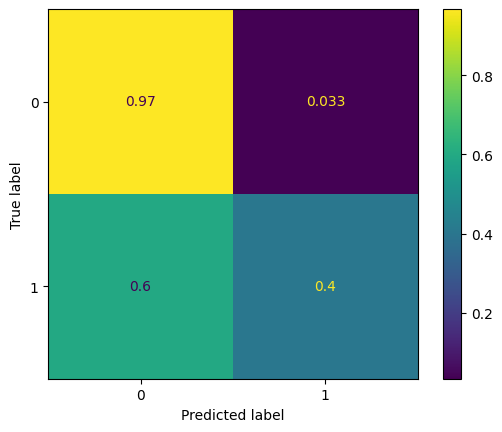

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_val, xg_y_model, normalize='true')
# Assuming xg_y_model are the predictions from your XGBoost model
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Our XGBoost model performs well on predicting **class 0** and performs poorly on predicting **class 1**, it may be caused by the imbalance of data provided(the target variable has more ‘No’ values than ‘Yes’ values).

#### Applying GridSearchCV 
##### One way to increase our model performance is by applying the Grid search method as an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

In [27]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
param_grid = {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5]
        }
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_Train, y_Train)
print(my_xgb_model.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'gamma': 0.5, 'max_depth': 3, 'min_child_weighth': 1, 'subsample': 1.0}


#### The above source code will evaluate which parameter values for min_child_weight, gamma, subsample and max_depth will give us better performance.

#### We will use these parameter values and see if the XGB model performance will increase.

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5)

xgb_model.fit(X_Train, y_Train)
y_pred = xgb_model.predict(X_Val)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_val, y_pred))


Error rate of the XGB classifier:  0.11347216319592013


Our XGB model has improved from the previous performance of **0.112** to **0.113**.

#### Model performance on test data

In [29]:
# Get the predicted result for the test Data
test.bank_account = xgb_model.predict(processed_test)

#### Submission File

In [30]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],"bank_account": test.bank_account})

#### Let's observe the sample results from our submission DataFrame.

In [31]:
#show the five sample
submission.sample(5)

,uniqueid,bank_account
4688,uniqueid_10823 x Rwanda,0
8582,uniqueid_8857 x Tanzania,0
2171,uniqueid_8240 x Kenya,0
5325,uniqueid_11460 x Rwanda,0
6542,uniqueid_6817 x Tanzania,0


#### Saving results in the CSV file

In [34]:
# Create submission csv file csv file
submission.to_csv('FirstSubmission.csv', index = False)


In [35]:
pd.read_csv('FirstSubmission.csv').head(5)

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0
